In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

import pickle

### Prepare Data

In [16]:
# Load data from csv files
# df = pd.read_csv('cl_Resources/census_data.csv')
# df_land = pd.read_csv('cl_Resources/Zipcode-Population-Density-2010.csv')
# df_unemployment = pd.read_csv('cl_Resources/Unemployment.csv')
df = pd.read_csv('cl_Resources/home_value_calc.csv')

In [17]:
df.head()

,Zipcode,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,...,pop_biz,commute time car,house_age,Land-Sq-Mi,zip_code,latitude,longitude,city,state,county
0,1001,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,...,461,NaN,49,11.442,1001,42.140549,-72.788661,Agawam,MA,Hampden
1,1002,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,...,480,188755.0,47,55.043,1002,42.367092,-72.464571,Amherst,MA,Hampshire
2,1003,11296.0,19.9,2499.0,-666666666.0,3829.0,10.0,3.0,1150.0,54.0,...,7,NaN,47,0.711,1003,42.369562,-72.635990,Amherst,MA,Hampshire
3,1005,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,...,89,NaN,47,44.242,1005,42.329160,-72.139465,Barre,MA,Worcester
4,1007,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,...,441,NaN,36,52.643,1007,42.280267,-72.402056,Belchertown,MA,Hampshire


In [18]:
df.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'median_home_value', 'Per Capita Income', 'Masters holders',
       'Bachelor holders', 'Median gross rent', 'Poverty Count',
       'Poverty Rate', 'Unemployment', 'Unemployment rate', 'pop_arc/eng',
       'pop_stem', 'pop_tech', 'pop_biz', 'commute time car', 'house_age',
       'Land-Sq-Mi', 'zip_code', 'latitude', 'longitude', 'city', 'state',
       'county'],
      dtype='object')

In [19]:
df.count()

Zipcode              32734
Population           32734
Median Age           32734
Household Income     32734
median_home_value    32734
Per Capita Income    32452
Masters holders      32734
Bachelor holders     32734
Median gross rent    32734
Poverty Count        32734
Poverty Rate         32416
Unemployment         32734
Unemployment rate    32416
pop_arc/eng          32734
pop_stem             32734
pop_tech             32734
pop_biz              32734
commute time car     10056
house_age            32734
Land-Sq-Mi           32734
zip_code             32734
latitude             32644
longitude            32644
city                 32734
state                32734
county               32734
dtype: int64

In [20]:
df = df[~(df == -666666666.0).any(axis=1)]

In [21]:
df.head()

,Zipcode,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,...,pop_biz,commute time car,house_age,Land-Sq-Mi,zip_code,latitude,longitude,city,state,county
0,1001,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,...,461,NaN,49,11.442,1001,42.140549,-72.788661,Agawam,MA,Hampden
1,1002,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,...,480,188755.0,47,55.043,1002,42.367092,-72.464571,Amherst,MA,Hampshire
3,1005,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,...,89,NaN,47,44.242,1005,42.329160,-72.139465,Barre,MA,Worcester
4,1007,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,...,441,NaN,36,52.643,1007,42.280267,-72.402056,Belchertown,MA,Hampshire
5,1008,1194.0,48.5,67250.0,235000.0,34505.0,97.0,164.0,831.0,49.0,...,14,NaN,55,53.796,1008,42.177833,-72.958359,Blandford,MA,Hampden


In [22]:
df.count()

Zipcode              26519
Population           26519
Median Age           26519
Household Income     26519
median_home_value    26519
Per Capita Income    26519
Masters holders      26519
Bachelor holders     26519
Median gross rent    26519
Poverty Count        26519
Poverty Rate         26519
Unemployment         26519
Unemployment rate    26519
pop_arc/eng          26519
pop_stem             26519
pop_tech             26519
pop_biz              26519
commute time car      7982
house_age            26519
Land-Sq-Mi           26519
zip_code             26519
latitude             26429
longitude            26429
city                 26519
state                26519
county               26519
dtype: int64

In [23]:
# Add a new column to df_new
df["Population Density"] = df["Population"]/df["Land-Sq-Mi"]

In [24]:
df.head()

,Zipcode,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,...,commute time car,house_age,Land-Sq-Mi,zip_code,latitude,longitude,city,state,county,Population Density
0,1001,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,...,NaN,49,11.442,1001,42.140549,-72.788661,Agawam,MA,Hampden,1522.723300
1,1002,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,...,188755.0,47,55.043,1002,42.367092,-72.464571,Amherst,MA,Hampshire,544.483404
3,1005,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,...,NaN,47,44.242,1005,42.329160,-72.139465,Barre,MA,Worcester,118.168256
4,1007,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,...,NaN,36,52.643,1007,42.280267,-72.402056,Belchertown,MA,Hampshire,282.810630
5,1008,1194.0,48.5,67250.0,235000.0,34505.0,97.0,164.0,831.0,49.0,...,NaN,55,53.796,1008,42.177833,-72.958359,Blandford,MA,Hampden,22.194959


In [25]:
df = df.drop(['Zipcode', 'zip_code','latitude', 'longitude', 'city', 'state', 'county'], axis=1)

In [26]:
df.head()

,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,Poverty Rate,Unemployment,Unemployment rate,pop_arc/eng,pop_stem,pop_tech,pop_biz,commute time car,house_age,Land-Sq-Mi,Population Density
0,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,8.391207,479.0,2.749240,149,411,240,461,NaN,49,11.442,1522.723300
1,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,27.864531,1271.0,4.240908,219,984,309,480,188755.0,47,55.043,544.483404
3,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,4.399388,153.0,2.926549,104,139,19,89,NaN,47,44.242,118.168256
4,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,9.470715,543.0,3.647233,147,402,184,441,NaN,36,52.643,282.810630
5,1194.0,48.5,67250.0,235000.0,34505.0,97.0,164.0,831.0,49.0,4.103853,63.0,5.276382,30,54,20,14,NaN,55,53.796,22.194959


In [27]:
# df_test = df.drop("median_home_value", axis=1)
df_test = df

In [28]:
 df_test_col_removed = df.drop(["Poverty Count", 'pop_tech', "commute time car", 'Bachelor holders', 'pop_biz','pop_stem', 'Land-Sq-Mi' ], axis=1)

In [29]:
df_test_col_removed.columns

Index(['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Median gross rent',
       'Poverty Rate', 'Unemployment', 'Unemployment rate', 'pop_arc/eng',
       'house_age', 'Population Density'],
      dtype='object')

In [30]:
df_test.columns

Index(['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Bachelor holders',
       'Median gross rent', 'Poverty Count', 'Poverty Rate', 'Unemployment',
       'Unemployment rate', 'pop_arc/eng', 'pop_stem', 'pop_tech', 'pop_biz',
       'commute time car', 'house_age', 'Land-Sq-Mi', 'Population Density'],
      dtype='object')

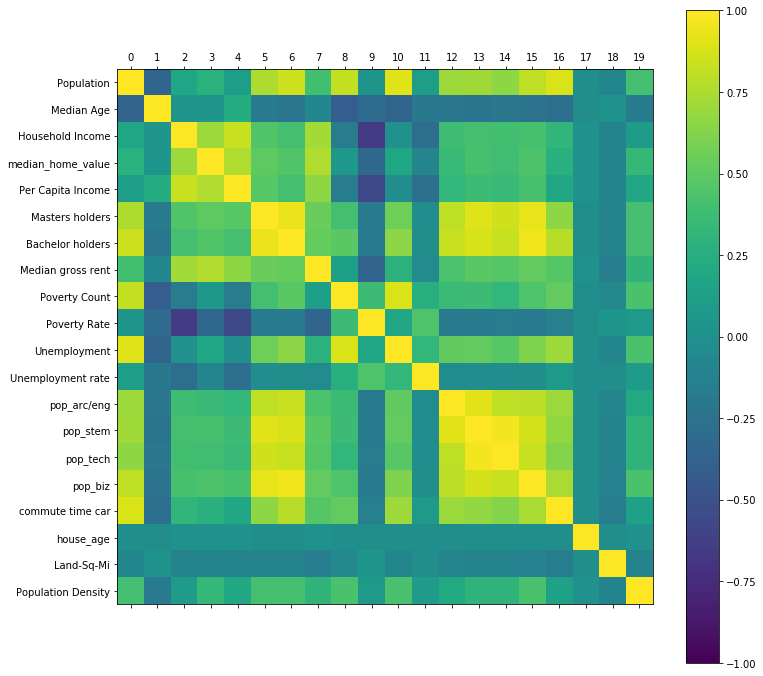

In [31]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

# data = pandas.read_csv(url, names=names)
# df_test = df_new.drop("median_home_value", axis=1)
correlations = df_test.corr()
# plot correlation matrix
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,20,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# names = ['Population', 'Median Age', 'Household Income', 'Per Capita Income',
#        'Masters holders', 'Median gross rent', 'Poverty Rate', 'Unemployment',
#        'Unemployment rate', 'pop_arc/eng', 'pop_tech', 'house_age',
#        'Land-Sq-Mi', 'Population Density']


names = ['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Bachelor holders',
       'Median gross rent', 'Poverty Count', 'Poverty Rate', 'Unemployment',
       'Unemployment rate', 'pop_arc/eng', 'pop_stem', 'pop_tech', 'pop_biz',
       'commute time car', 'house_age', 'Land-Sq-Mi', 'Population Density']
# ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

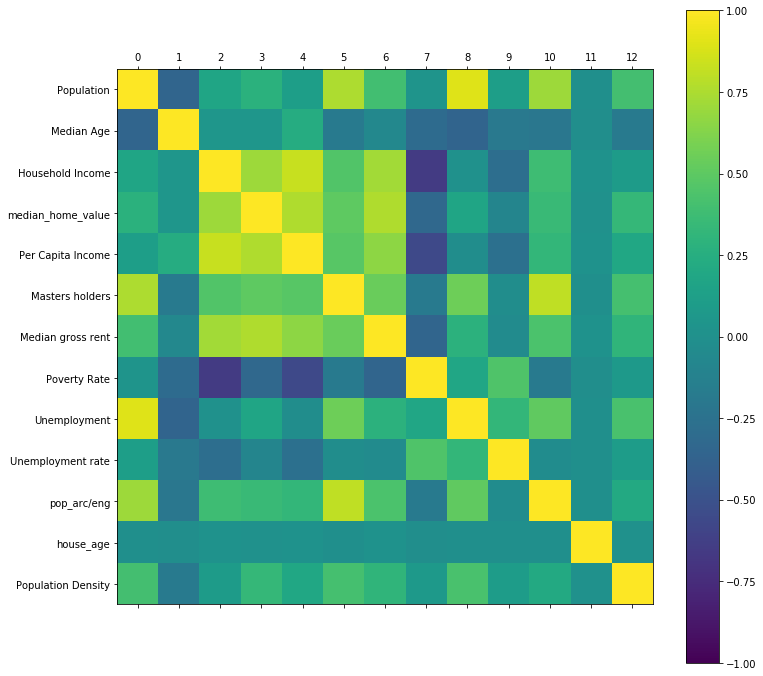

In [32]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

# data = pandas.read_csv(url, names=names)
# df_test = df_new.drop("median_home_value", axis=1)
correlations = df_test_col_removed.corr()
# plot correlation matrix
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# names = ['Population', 'Median Age', 'Household Income', 'Per Capita Income',
#        'Masters holders', 'Median gross rent', 'Poverty Rate', 'Unemployment',
#        'Unemployment rate', 'pop_arc/eng', 'pop_tech', 'house_age',
#        'Land-Sq-Mi', 'Population Density']


names = ['Population', 'Median Age', 'Household Income', 'median_home_value',
       'Per Capita Income', 'Masters holders', 'Median gross rent',
       'Poverty Rate', 'Unemployment', 'Unemployment rate', 'pop_arc/eng',
       'house_age', 'Population Density']
# ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [33]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
X = df_test_col_removed.drop('median_home_value', axis=1)

# X = df_test_col_removed
# X = df_new[["Population", "Median Age", "Household Income", "Per Capita Income", "Poverty Rate", "Land-Sq-Mi", "Unemp Rate", "Population Density"]]
# X = df_new[["Household Income", "Population Density", "Poverty Rate", "Per Capita Income", "Median Age", "Unemp Rate"]]
# X = df_new[["Household Income", "Population Density", "Poverty Rate", "Median Age", "Unemp Rate"]]
# X = df_new[["Household Income", "Per Capita Income", "Poverty Rate", "Median Age", "Unemp Rate"]]
y = df_test_col_removed["median_home_value"].values.reshape(-1, 1)
print(X.shape, y.shape)

(26519, 12) (26519, 1)


Text(0,0.5,'House Value')

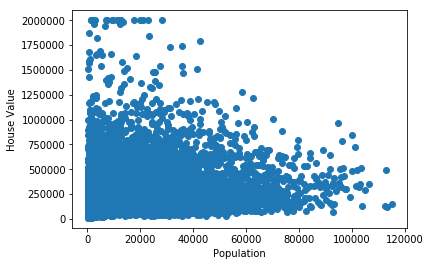

In [34]:
# Plot the data to see if a linear trend exists for Population
# Can plot for each features
plt.scatter(X["Population"], y)
plt.xlabel("Population")
plt.ylabel("House Value")

Text(0,0.5,'House Value')

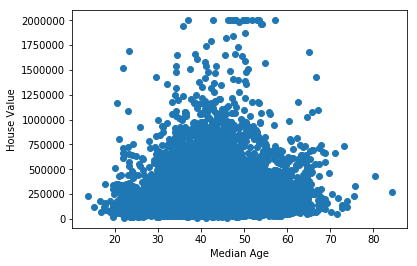

In [35]:
# Plot the data to see if a linear trend exists for Median Age
# Can plot for each features
plt.scatter(X["Median Age"], y)
plt.xlabel("Median Age")
plt.ylabel("House Value")

Text(0,0.5,'House Value')

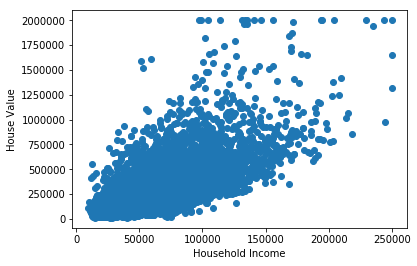

In [36]:
# Plot the data to see if a linear trend exists for Household Income
# Can plot for each features
plt.scatter(X["Household Income"], y)
plt.xlabel("Household Income")
plt.ylabel("House Value")

Text(0,0.5,'House Value')

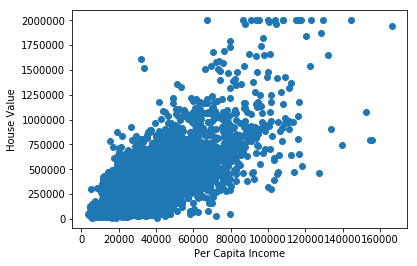

In [37]:
# Plot the data to see if a linear trend exists for Per Capita Income
# Can plot for each features
plt.scatter(X["Per Capita Income"], y)
plt.xlabel("Per Capita Income")
plt.ylabel("House Value")

Text(0,0.5,'House Value')

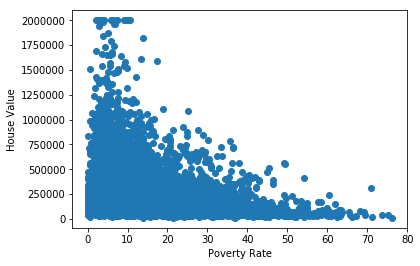

In [38]:
# Plot the data to see if a linear trend exists for Poverty Rate
# Can plot for each features
plt.scatter(X["Poverty Rate"], y)
plt.xlabel("Poverty Rate")
plt.ylabel("House Value")

Text(0,0.5,'House Value')

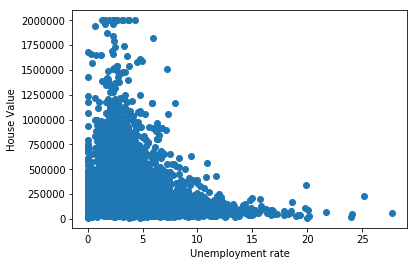

In [39]:
# Plot the data to see if a linear trend exists for Unemployment Rate
# Can plot for each features
plt.scatter(X["Unemployment rate"], y)
plt.xlabel("Unemployment rate")
plt.ylabel("House Value")

Text(0,0.5,'House Value')

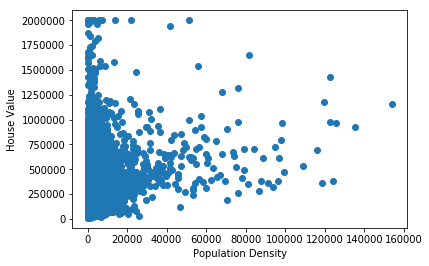

In [40]:
# Plot the data to see if a linear trend exists for Population Density
# Can plot for each features
plt.scatter(X["Population Density"], y)
plt.xlabel("Population Density")
plt.ylabel("House Value")

In [41]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
# Scale data with SKLearn StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [43]:
X_test_scaled[0]

array([-0.31078969,  0.11738345,  0.22866739,  0.34154584, -0.27276221,
        0.58311992, -0.45964101, -0.22551918,  0.32921035, -0.37015243,
       -0.01418429, -0.25559417])

### Linear regression Model

In [44]:
## Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [45]:
# Fitting our model with training data
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Make prediction with test data
predictions = model.predict(X_test_scaled)

In [47]:
# Evaluate the model by Calculate the following for the test data
# 1. Calculate the mean_squared_error (mse)
# 2. the r-squared value (r2)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

# Or by calling the `score` method on the model to show the r2 score
model.score(X_test_scaled, y_test_scaled)

MSE: 0.25869192994749923, R2: 0.7470362519779569


0.7470362519779569

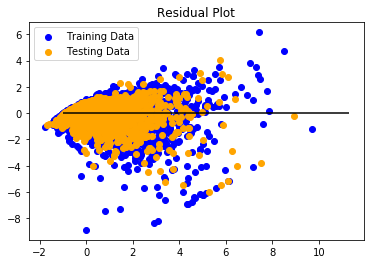

In [48]:
# Residual plot
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [49]:
# Make a prediction
# X_scaled_new = [[ 0.80809856,  1.35009033, -0.01890773,  0.34549878, -0.82941627, 0.2246137 ]]
# X_scaled_new = [[ 3.48460584, -0.82941627,  0.80809856, 0.2345, 0.5678, -0.33548015, 0.2246137 ,  1.35009033]]
# X_scaled_new = [[ 3.48460584, -0.82941627,  0.80809856,  0.34549878, -0.01890773, -0.33548015,  0.2246137 ,  1.35009033]]

# X_scaled_new = [[-0.11078969,  0.51738345,  0.*2866739,  0.34154584, -0.27276221,
#         0.98311992, -0.45964101,  0.82921035, -0.37015243, -0.01418429,
#        -0.91011539, -0.95559417]]

X_scaled_new = [[-0.31078969,  0.91738345,  0.82866739,  0.34154584, -0.27276221,
        0.58311992, -0.45964101, -0.22551918,  0.32921035, -0.37015243,
       -0.01418429, -0.25559417]]
prediction_scaled = model.predict(X_scaled_new)
prediction = y_scaler.inverse_transform(prediction_scaled)
prediction

array([[250984.06303231]])

In [50]:
## LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.26010303039399474, R2: 0.7456563973460264


In [51]:
## Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.25869195364894837, R2: 0.7470362288013258


In [52]:
## ElasticNet model
# Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2595141466534755, R2: 0.7462322415100915


### Random Forest Regression Model

In [53]:
# Train a random forest regression model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300)
rf = rf.fit(X_train_scaled, y_train_scaled)

# save the model
filename = 'cl_model.sav'
pickle.dump(rf, open(filename, 'wb'))

# R2 for training data
rf.score(X_train_scaled, y_train_scaled)

/anaconda3/envs/MyPython36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9707861629177622

In [54]:
importances = rf.feature_importances_
importances_list = sorted(zip(rf.feature_importances_, X.keys()), reverse=True)

In [55]:
importances_list

[(0.5099272635935101, 'Median gross rent'),
 (0.25201327375848986, 'Per Capita Income'),
 (0.039969636169588256, 'Population Density'),
 (0.03297379028293199, 'house_age'),
 (0.031008439769198304, 'Median Age'),
 (0.02595061063366613, 'Poverty Rate'),
 (0.025679269818426394, 'Household Income'),
 (0.02144225476242974, 'Unemployment rate'),
 (0.019511484573317965, 'Masters holders'),
 (0.01713879923206799, 'pop_arc/eng'),
 (0.01346120386484591, 'Population'),
 (0.010923973541527549, 'Unemployment')]

In [56]:
# R2 for testing data
rf.score(X_test_scaled, y_test_scaled)

0.8097876445803069

In [57]:
# load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test_scaled)

In [58]:
result

0.8097876445803069

In [60]:
# Make a prediction
X_scaled_new = [[-0.31078969,  0.91738345,  0.82866739,  0.34154584, -0.27276221,
        0.58311992, -0.45964101, -0.22551918,  0.32921035, -0.37015243,
       -0.01418429, -0.25559417]]
prediction_scaled = rf.predict(X_scaled_new)
prediction = y_scaler.inverse_transform(prediction_scaled)
prediction

array([246392.66666667])

In [61]:
# Make a prediction
# X_scaled_new = ([[ 0.90809856,  1.35009033, -0.01890773,  0.94549878, -0.82941627, 0 ]])
# X_scaled_new = [[ 0.80809856,  1.35009033,  3.48460584, 0.3456,  0.34549878, -0.82941627,  0.2246137 ]]
prediction_scaled = loaded_model.predict(X_scaled_new)
prediction = y_scaler.inverse_transform(prediction_scaled)
prediction

array([246392.66666667])

In [62]:
loaded_model.feature_importances_

array([0.0134612 , 0.03100844, 0.02567927, 0.25201327, 0.01951148,
       0.50992726, 0.02595061, 0.01092397, 0.02144225, 0.0171388 ,
       0.03297379, 0.03996964])

In [65]:
importances = loaded_model.feature_importances_
importances_list = sorted(zip(loaded_model.feature_importances_, X.keys()), reverse=True)

In [64]:
importances_list_new

[(0.5099272635935101, 'Median gross rent'),
 (0.25201327375848986, 'Per Capita Income'),
 (0.039969636169588256, 'Population Density'),
 (0.03297379028293199, 'house_age'),
 (0.031008439769198304, 'Median Age'),
 (0.02595061063366613, 'Poverty Rate'),
 (0.025679269818426394, 'Household Income'),
 (0.02144225476242974, 'Unemployment rate'),
 (0.019511484573317965, 'Masters holders'),
 (0.01713879923206799, 'pop_arc/eng'),
 (0.01346120386484591, 'Population'),
 (0.010923973541527549, 'Unemployment')]